# A code example: S Mus, BH3

In [1]:

from simbinary import SimBinary, fitGaia
import matplotlib.pyplot as plt


### A Cepheid S Mus

In [9]:
params = {'Object': 'S Mus', #simbad resolved name
# 'id3': 11111..., if no gaia resolved name, write gaia dr3 id here
 'type': 'cepheid', # can be 'binary' or 'BH'
 'P': 506.3,
 'a': 2.95,
 'e': 0.088,
 'i': 144.7,
 'Omega': 99.6,
 'w': 194.8,
 'T0': 2457165.9,
 'q': 0.885,
 'pll': 1.167,
 'Vcomp': 8.2 # mandatory for types cepheid and binary
}

In [10]:
sb = SimBinary(params, DataRelease = 4) # DataRelease from 1 to 5

sim_astrometry = sb.get_dataframe() # a dataframe with Gaia-like data

Gaia DR3 ID added with Simbad
RA/DEC coordinates added with Gaia DR3
Proper motion RA/DEC added with Gaia DR3
Gmag added with Gaia DR3
Applying correction for DR3 proper motion...
Vector: -0.25113181203238377 0.3026658468351889
Proper motion corrected to: -7.887941991774248 and -1.8134954692137986 mas


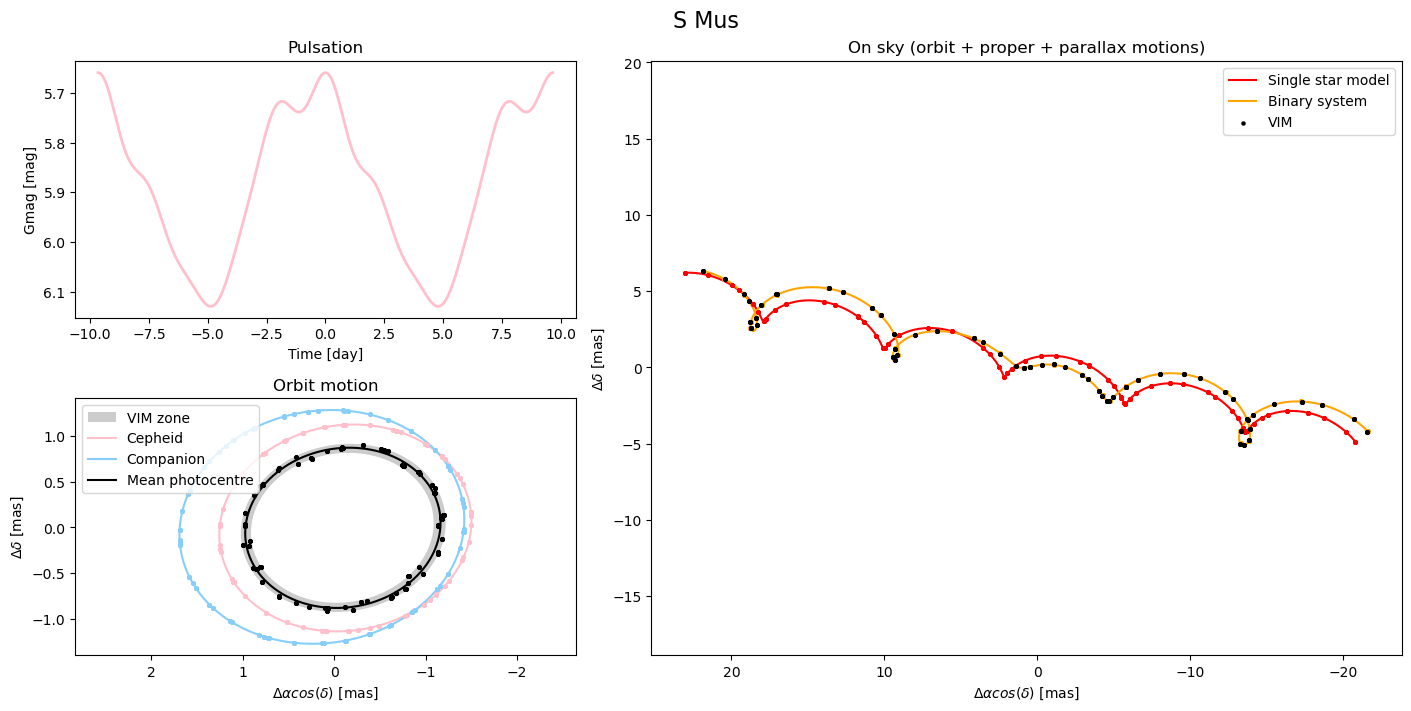

In [11]:
sb.PlotCepheid(Npoints=500) # plot. for non pulsating targets use sb.Plot
# has plot_dir - a directory where it saves the plot and Npoints - number of points to consider for visualization


[-0.17680472 -0.02150233 -0.05536601 -0.00484803  1.13988736]


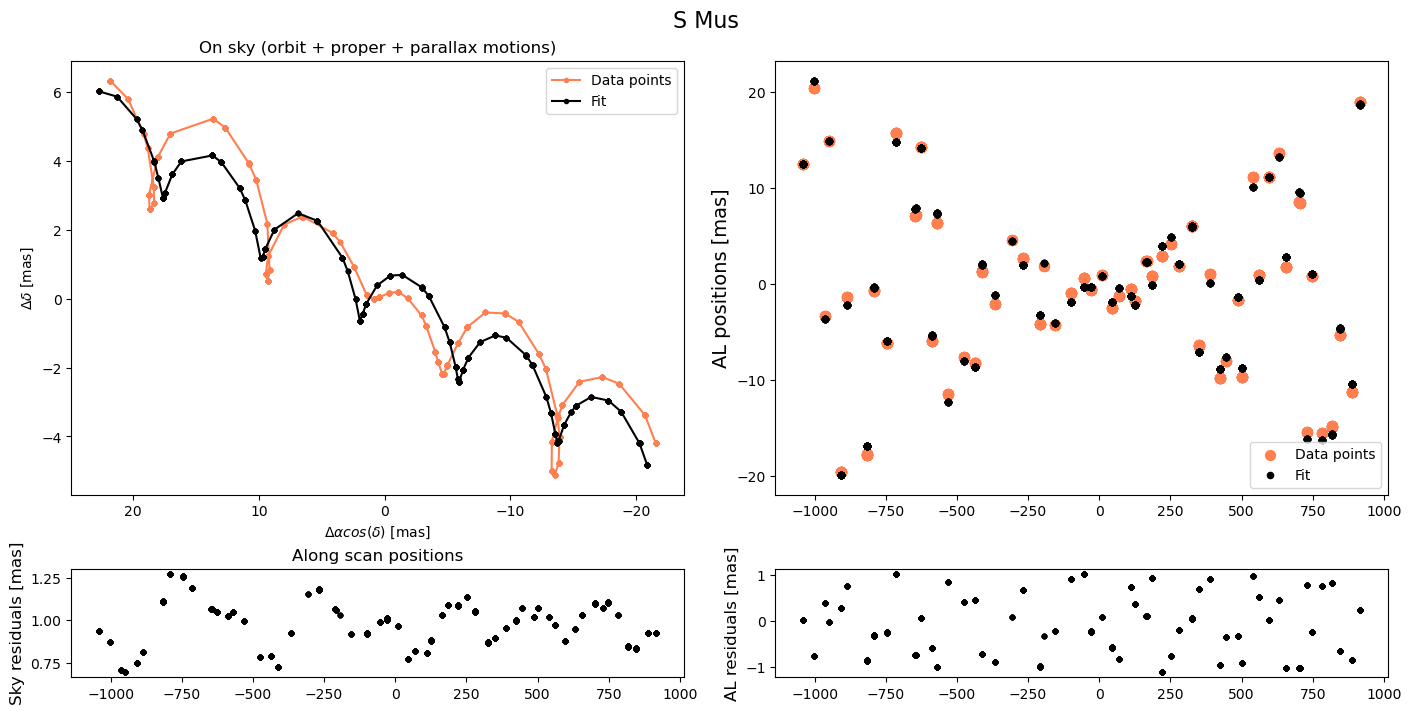

In [12]:
sb.PlotSSfit() # Single Star fit to data

In [13]:
fG = fitGaia(params['Object'], DataRelease=4) # initialize fitting
fG.load_dataframe(sim_astrometry) # give data to fit, can be a dataframe from simulations or a file
# fG.load_file(self, filename_to_use) if needed from a file
fit_parameters = fG.fit_kepmodel() # fit using kepmodel. fit_dir to save resulting parameters

Parameter                        Value     Error       
lin.ra                       -0.176805  ±  0.000918    
lin.dec                      -0.055366  ±  0.000937    
lin.parallax                   1.13989  ±  0.00110     
lin.mura                     -7.853725  ±  0.000586    
lin.mudec                    -1.770743  ±  0.000577    
Parameter                        Value     Error       
lin.ra                        -0.02056  ±  0.00334     
lin.dec                        0.01165  ±  0.00262     
lin.parallax                   1.16227  ±  0.00115     
lin.mura                     -7.886303  ±  0.000601    
lin.mudec                    -1.816236  ±  0.000597    
kep.0.P                       506.0666  ±  0.0643      
kep.0.Tp                       -251.88  ±  1.74        
kep.0.as                       1.07394  ±  0.00133     
kep.0.e                        0.08202  ±  0.00198     
kep.0.w [deg]                    24.90  ±  1.26        
kep.0.i [deg]                  145.517  ±  0.172

Text(0, 0.5, 'Along scan, [mas]')

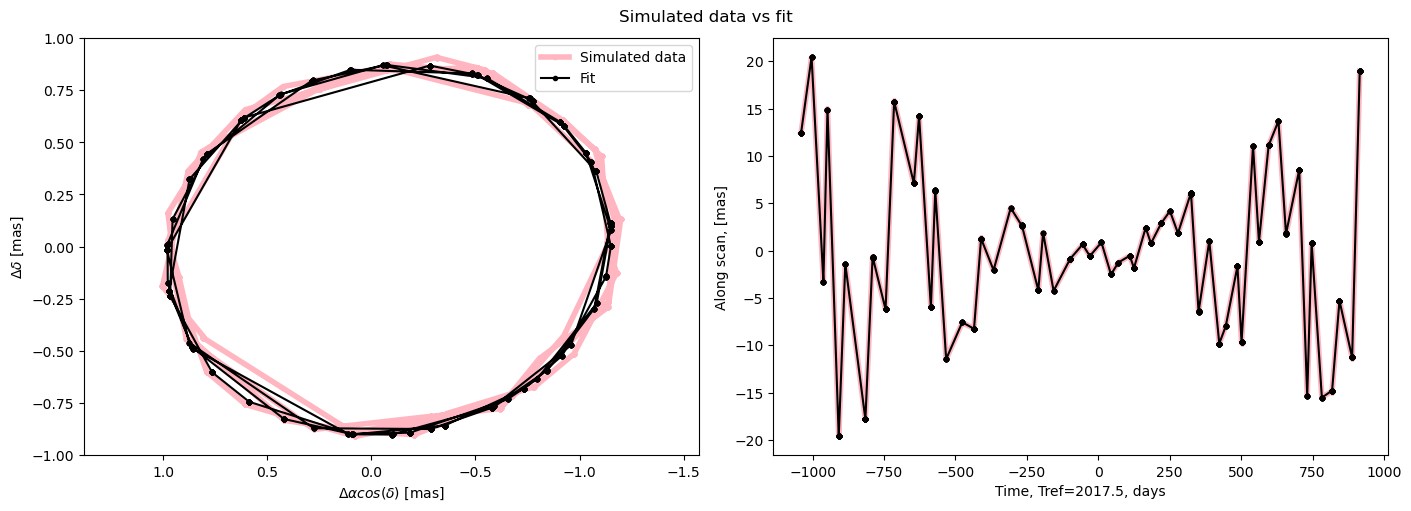

In [14]:
w_fit = fG.keplerian_model.model() # fitted along scan
ra_fit, dec_fit = sb.orbit(fit_parameters, sb.reltimes) # fitted
ra_ph, dec_ph = sb.Data['ra_ph'], sb.Data['dec_ph'] # photocentric orbit

fig, axs = plt.subplots(1,2, figsize=(14, 5), constrained_layout=True)
ax1, ax2 = axs
fig.suptitle('Simulated data vs fit')
ax1.plot(ra_ph, dec_ph, label = 'Simulated data', marker='.', lw = 4, color='lightpink')
ax1.plot(ra_fit, dec_fit, label = 'Fit', marker='.', color = 'black')
ax1.set_aspect('equal', adjustable='datalim')
ax1.xaxis.set_inverted(True)
ax1.set_xlabel(r'$\Delta \alpha cos(\delta)$ [mas]')
ax1.set_ylabel(r'$\Delta \delta$ [mas]')
ax1.legend()

ax2.plot(sb.reltimes, sb.w_bs, marker='.', lw = 4, color='lightpink')
ax2.plot(sb.reltimes, w_fit, marker='.', color = 'black')
ax2.set_xlabel(f'Time, Tref={sb.Tref}, days')
ax2.set_ylabel('Along scan, [mas]')

### Gaia BH3

In [17]:
params = {'Object': 'BH3', #simbad resolved name
 'id3': str(4318465066420528000), #if no gaia resolved name, write gaia dr3 id here
 'type': 'BH', # can be 'binary' or 'BH'
 'P': 4253.1,
 'a': 27.39,
 'e': 0.7291,
 'i': 110.580,
 'Omega': 136.236,
 'w': 77.34,
 'T0': 2458177.39,
 'q': 43.0263,
 'pll': 1.6933
}

sb = SimBinary(params, DataRelease = 4) # DataRelease from 1 to 5

sim_astrometry = sb.get_dataframe() # a dataframe with Gaia-like data

RA/DEC coordinates added with Gaia DR3
Proper motion RA/DEC added with Gaia DR3
Gmag added with Gaia DR3
Applying correction for DR3 proper motion...
Vector: 6.268728639304831 -0.2437501691339898
Proper motion corrected to: -28.50332502972484 and -155.0327213653957 mas


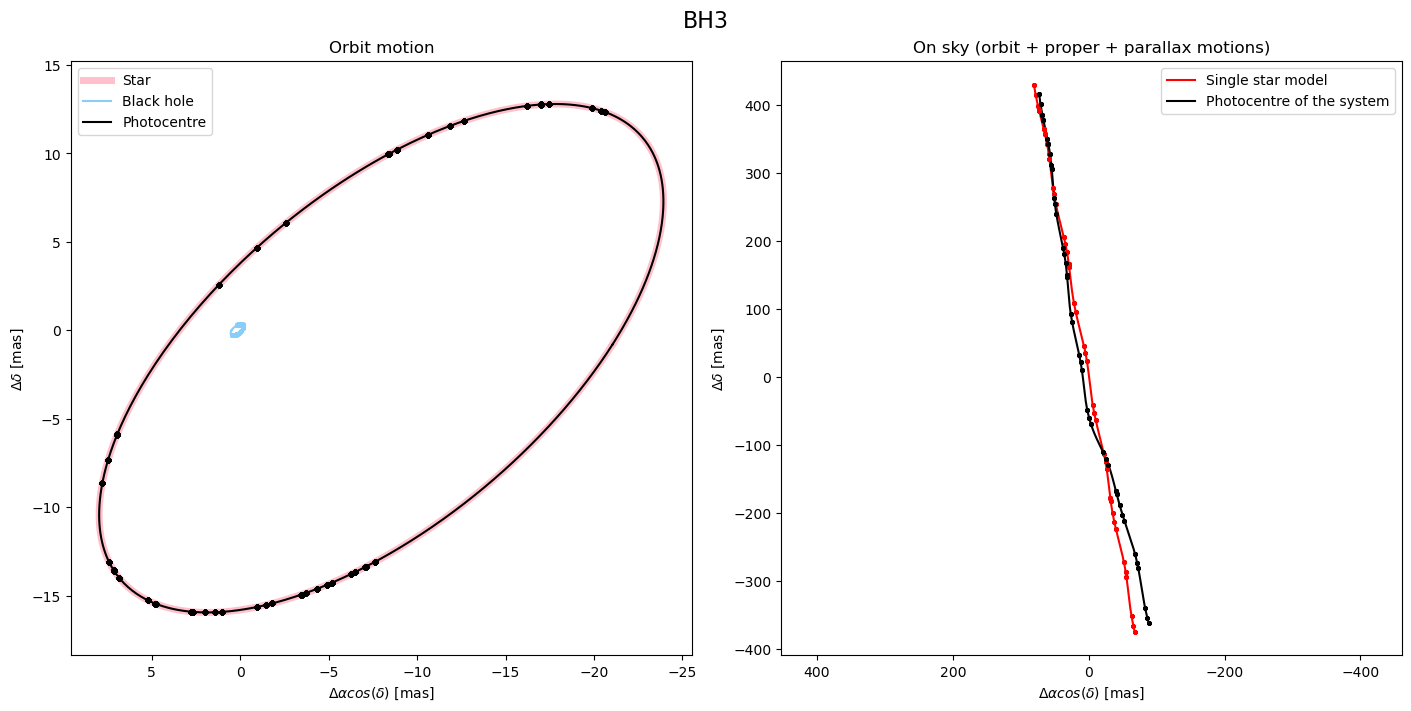

In [18]:
sb.Plot(Npoints=500)